<a href="https://colab.research.google.com/github/asyrofist/tugasKK1_Ontology/blob/master/Document_vector_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Clone the entire repo.
!git clone -l -s https://github.com/asyrofist/tugasPKPL.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 54 (delta 23), reused 12 (delta 3), pack-reused 0
Unpacking objects: 100% (54/54), done.
/content/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo/cloned-repo
nltk  PKPL.ipynb  README.md  sklearn  srs2.csv	srs3.csv  TPOT.ipynb


# Text Preprocessing

In [0]:
import pandas as pd
from time import time

print("Loading Dataset...")
t0 = time()
dataset2 = pd.read_csv('/content/cloned-repo/srs2.csv')
print("done in %0.3fs." % (time() - t0))
dataset2.head(n = 100)

Loading Dataset...
done in 0.005s.


,ID,Requirement Statement
0,F01,Users can create a new diary.
1,F02,Users can add titles to the diary.
2,F03,Users can add weather to the diary.
3,F04,Users can add dates to the diary.
4,F06,Users can add hours to the diary.
5,F07,Users can add seconds to the diary.
6,F08,Users can save diaries.
7,F09,Users can add photos to the diary.
8,F10,Users can read the diary that has been created.
9,F11,Users can share diaries in the form of postcards.


In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import nltk
import string
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
import re 

stemming = PorterStemmer()
stops = set(stopwords.words("english"))

# cleaning text
def text_cleaning(raw):
  
  # lowering word
  lower_case = raw.lower()

  # hapus punctuatioation & lower
  hasil_punctuation = lower_case.translate(str.maketrans("","",string.punctuation))
  
  # hapus whitespace
  hasil_whitespace = hasil_punctuation.strip()

  # hapus angka
  hasil_hapusangka = re.sub(r"\d+", "", hasil_whitespace)
  
  # tokenisasi 
  tokens = nltk.tokenize.word_tokenize(hasil_hapusangka)
  
  # Stemming
  stemmed_words = [stemming.stem(w) for w in tokens]
  
  # Remove stop words
  meaningful_words = [w for w in stemmed_words if not w in stops]
  
  # Rejoin meaningful stemmed words
  joined_words = ( " ".join(meaningful_words))
  
  # Return cleaned data
  return joined_words  

# applying
def apply_cleaning(hasil):
    cleaned_hasil = []
    for element in hasil:
        cleaned_hasil.append(text_cleaning(element))
    return cleaned_hasil

# Load data example (dari functional maupun nonfunctional)
statement = dataset2

# Truncate data for example
statement = statement.head(100)

# Get text to clean (dari row yang diinginkan)
text_to_clean = list(statement['Requirement Statement'])

# Clean text
print("Loading Original & Cleaned Text...")
t0 = time()
cleaned_text = apply_cleaning(text_to_clean)

# Show first example
print("done in %0.3fs." % (time() - t0))
pd.DataFrame([text_to_clean, cleaned_text],index=['ORIGINAL','CLEANED'],columns=statement['ID'])

Loading Original & Cleaned Text...
done in 0.011s.


ID,F01,F02,F03,F04,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,NF01,NF02,NF03,NF04,NF05,NF06,NF07,NF08,NF09
ORIGINAL,Users can create a new diary.,Users can add titles to the diary.,Users can add weather to the diary.,Users can add dates to the diary.,Users can add hours to the diary.,Users can add seconds to the diary.,Users can save diaries.,Users can add photos to the diary.,Users can read the diary that has been created.,Users can share diaries in the form of postcards.,Users can save postcards.,Users can change the postcard background color.,Users can change the color of posts on the pos...,Users can delete the diary.,Users can edit the diary that has been created.,Users can open a calendar that contains a diary.,The system can open a diary editor.,The application has a high level of availabili...,Applications must have a high degree of flexib...,This application must have a high level of int...,This application has a high usability aspect a...,This application must have a response time val...,Applications must have a high level of interop...,Documentation must be included in the system s...,The application must have a high degree of fle...,The modules in the system will be designed and...
CLEANED,user creat new diari,user add titl diari,user add weather diari,user add date diari,user add hour diari,user add second diari,user save diari,user add photo diari,user read diari ha creat,user share diari form postcard,user save postcard,user chang postcard background color,user chang color post postcard,user delet diari,user edit diari ha creat,user open calendar contain diari,system open diari editor,applic ha high level avail oper continu seven ...,applic must high degre flexibilitywhich must a...,thi applic must high level integr data secur i...,thi applic ha high usabl aspect easi use inter...,thi applic must respons time valu quit good fa...,applic must high level interoperabilitybecaus ...,document must includ system sourc code develop...,applic must high degre flexibilityand use user...,modul system design program structur way conti...


# Document Vector

In [0]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
raw_sentences = cleaned_text
string_sentences = ' '
string_sentences = string_sentences.join(raw_sentences)
wordlist = string_sentences.split(' ')

In [0]:
string_sentences

'user creat new diari user add titl diari user add weather diari user add date diari user add hour diari user add second diari user save diari user add photo diari user read diari ha creat user share diari form postcard user save postcard user chang postcard background color user chang color post postcard user delet diari user edit diari ha creat user open calendar contain diari system open diari editor applic ha high level avail oper continu seven day per week hour per day without stop applic must high degre flexibilitywhich must abl run devic use kitkat version android oper system abov thi applic must high level integr data secur includ secur form password user thi applic ha high usabl aspect easi use interfac applic introduc two hoursth new user creat diari less three minut thi applic must respons time valu quit good fast access extend perform result toler three second applic must high level interoperabilitybecaus one need thi applic connect social media lineinstagramand facebook do

In [0]:
cleaned_text

['user creat new diari',
 'user add titl diari',
 'user add weather diari',
 'user add date diari',
 'user add hour diari',
 'user add second diari',
 'user save diari',
 'user add photo diari',
 'user read diari ha creat',
 'user share diari form postcard',
 'user save postcard',
 'user chang postcard background color',
 'user chang color post postcard',
 'user delet diari',
 'user edit diari ha creat',
 'user open calendar contain diari',
 'system open diari editor',
 'applic ha high level avail oper continu seven day per week hour per day without stop',
 'applic must high degre flexibilitywhich must abl run devic use kitkat version android oper system abov',
 'thi applic must high level integr data secur includ secur form password user',
 'thi applic ha high usabl aspect easi use interfac applic introduc two hoursth new user creat diari less three minut',
 'thi applic must respons time valu quit good fast access extend perform result toler three second',
 'applic must high level int

In [0]:
raw_sentences

['user creat new diari',
 'user add titl diari',
 'user add weather diari',
 'user add date diari',
 'user add hour diari',
 'user add second diari',
 'user save diari',
 'user add photo diari',
 'user read diari ha creat',
 'user share diari form postcard',
 'user save postcard',
 'user chang postcard background color',
 'user chang color post postcard',
 'user delet diari',
 'user edit diari ha creat',
 'user open calendar contain diari',
 'system open diari editor',
 'applic ha high level avail oper continu seven day per week hour per day without stop',
 'applic must high degre flexibilitywhich must abl run devic use kitkat version android oper system abov',
 'thi applic must high level integr data secur includ secur form password user',
 'thi applic ha high usabl aspect easi use interfac applic introduc two hoursth new user creat diari less three minut',
 'thi applic must respons time valu quit good fast access extend perform result toler three second',
 'applic must high level int

In [0]:
wordlist

['user',
 'creat',
 'new',
 'diari',
 'user',
 'add',
 'titl',
 'diari',
 'user',
 'add',
 'weather',
 'diari',
 'user',
 'add',
 'date',
 'diari',
 'user',
 'add',
 'hour',
 'diari',
 'user',
 'add',
 'second',
 'diari',
 'user',
 'save',
 'diari',
 'user',
 'add',
 'photo',
 'diari',
 'user',
 'read',
 'diari',
 'ha',
 'creat',
 'user',
 'share',
 'diari',
 'form',
 'postcard',
 'user',
 'save',
 'postcard',
 'user',
 'chang',
 'postcard',
 'background',
 'color',
 'user',
 'chang',
 'color',
 'post',
 'postcard',
 'user',
 'delet',
 'diari',
 'user',
 'edit',
 'diari',
 'ha',
 'creat',
 'user',
 'open',
 'calendar',
 'contain',
 'diari',
 'system',
 'open',
 'diari',
 'editor',
 'applic',
 'ha',
 'high',
 'level',
 'avail',
 'oper',
 'continu',
 'seven',
 'day',
 'per',
 'week',
 'hour',
 'per',
 'day',
 'without',
 'stop',
 'applic',
 'must',
 'high',
 'degre',
 'flexibilitywhich',
 'must',
 'abl',
 'run',
 'devic',
 'use',
 'kitkat',
 'version',
 'android',
 'oper',
 'system',
 'a

In [0]:
words = set(wordlist)
words

{'abl',
 'abov',
 'access',
 'add',
 'addit',
 'age',
 'android',
 'applic',
 'aspect',
 'avail',
 'background',
 'calendar',
 'chang',
 'code',
 'color',
 'connect',
 'contain',
 'continu',
 'creat',
 'data',
 'date',
 'day',
 'degre',
 'delet',
 'design',
 'develop',
 'developmentso',
 'devic',
 'diari',
 'document',
 'easi',
 'edit',
 'editor',
 'extend',
 'facebook',
 'fast',
 'flexibilityand',
 'flexibilitywhich',
 'form',
 'good',
 'ha',
 'high',
 'hour',
 'hoursth',
 'includ',
 'integr',
 'interfac',
 'interoperabilitybecaus',
 'introduc',
 'kitkat',
 'less',
 'level',
 'lineinstagramand',
 'made',
 'maintain',
 'media',
 'minut',
 'modul',
 'must',
 'need',
 'new',
 'one',
 'open',
 'oper',
 'password',
 'per',
 'perform',
 'photo',
 'post',
 'postcard',
 'program',
 'quit',
 'read',
 'reread',
 'respons',
 'result',
 'reusabl',
 'run',
 'save',
 'second',
 'secur',
 'seven',
 'share',
 'social',
 'sourc',
 'stop',
 'structur',
 'system',
 'thi',
 'three',
 'time',
 'titl',
 't

In [0]:
word2int = {}
int2word = {}
vocab_size = len(words)

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [0]:
word2int

{'abl': 101,
 'abov': 8,
 'access': 59,
 'add': 21,
 'addit': 84,
 'age': 34,
 'android': 67,
 'applic': 86,
 'aspect': 36,
 'avail': 66,
 'background': 39,
 'calendar': 31,
 'chang': 57,
 'code': 58,
 'color': 22,
 'connect': 4,
 'contain': 13,
 'continu': 76,
 'creat': 0,
 'data': 54,
 'date': 10,
 'day': 50,
 'degre': 35,
 'delet': 73,
 'design': 7,
 'develop': 14,
 'developmentso': 26,
 'devic': 17,
 'diari': 33,
 'document': 23,
 'easi': 5,
 'edit': 44,
 'editor': 11,
 'extend': 9,
 'facebook': 68,
 'fast': 29,
 'flexibilityand': 94,
 'flexibilitywhich': 15,
 'form': 78,
 'good': 19,
 'ha': 92,
 'high': 30,
 'hour': 49,
 'hoursth': 24,
 'includ': 27,
 'integr': 51,
 'interfac': 87,
 'interoperabilitybecaus': 6,
 'introduc': 2,
 'kitkat': 1,
 'less': 43,
 'level': 41,
 'lineinstagramand': 83,
 'made': 18,
 'maintain': 80,
 'media': 88,
 'minut': 99,
 'modul': 75,
 'must': 100,
 'need': 61,
 'new': 37,
 'one': 69,
 'open': 70,
 'oper': 20,
 'password': 60,
 'per': 45,
 'perform': 96

In [0]:
int2word

{0: 'creat',
 1: 'kitkat',
 2: 'introduc',
 3: 'thi',
 4: 'connect',
 5: 'easi',
 6: 'interoperabilitybecaus',
 7: 'design',
 8: 'abov',
 9: 'extend',
 10: 'date',
 11: 'editor',
 12: 'social',
 13: 'contain',
 14: 'develop',
 15: 'flexibilitywhich',
 16: 'structur',
 17: 'devic',
 18: 'made',
 19: 'good',
 20: 'oper',
 21: 'add',
 22: 'color',
 23: 'document',
 24: 'hoursth',
 25: 'system',
 26: 'developmentso',
 27: 'includ',
 28: 'three',
 29: 'fast',
 30: 'high',
 31: 'calendar',
 32: 'without',
 33: 'diari',
 34: 'age',
 35: 'degre',
 36: 'aspect',
 37: 'new',
 38: 'quit',
 39: 'background',
 40: 'weather',
 41: 'level',
 42: 'program',
 43: 'less',
 44: 'edit',
 45: 'per',
 46: 'post',
 47: 'reread',
 48: 'week',
 49: 'hour',
 50: 'day',
 51: 'integr',
 52: 'secur',
 53: 'use',
 54: 'data',
 55: 'version',
 56: 'toler',
 57: 'chang',
 58: 'code',
 59: 'access',
 60: 'password',
 61: 'need',
 62: 'two',
 63: 'user',
 64: 'sourc',
 65: 'postcard',
 66: 'avail',
 67: 'android',
 68:

In [0]:
vocab_size

104

In [0]:
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [0]:
sentences

[['user', 'creat', 'new', 'diari'],
 ['user', 'add', 'titl', 'diari'],
 ['user', 'add', 'weather', 'diari'],
 ['user', 'add', 'date', 'diari'],
 ['user', 'add', 'hour', 'diari'],
 ['user', 'add', 'second', 'diari'],
 ['user', 'save', 'diari'],
 ['user', 'add', 'photo', 'diari'],
 ['user', 'read', 'diari', 'ha', 'creat'],
 ['user', 'share', 'diari', 'form', 'postcard'],
 ['user', 'save', 'postcard'],
 ['user', 'chang', 'postcard', 'background', 'color'],
 ['user', 'chang', 'color', 'post', 'postcard'],
 ['user', 'delet', 'diari'],
 ['user', 'edit', 'diari', 'ha', 'creat'],
 ['user', 'open', 'calendar', 'contain', 'diari'],
 ['system', 'open', 'diari', 'editor'],
 ['applic',
  'ha',
  'high',
  'level',
  'avail',
  'oper',
  'continu',
  'seven',
  'day',
  'per',
  'week',
  'hour',
  'per',
  'day',
  'without',
  'stop'],
 ['applic',
  'must',
  'high',
  'degre',
  'flexibilitywhich',
  'must',
  'abl',
  'run',
  'devic',
  'use',
  'kitkat',
  'version',
  'android',
  'oper',
  '

In [0]:
# Masih ERROR!
# sentences[0:2]
# import pandas as pd
# pd.options.mode.chained_assignment = None 
# import numpy as np
# import re
# import nltk

# from gensim.models import word2vec

# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# %matplotlib inline

# model = word2vec.Word2Vec(sentences, size=26, window=20, min_count=200, workers=4)
# model.wv['user']

import re               # Obtain expressions 
from gensim.models import Word2Vec    #Import gensim Word2Fec
from sklearn.decomposition import PCA #Grab PCA functions

#Plot helpers
import matplotlib
import matplotlib.pyplot as plt
#Enable matplotlib to be interactive (zoom etc)
%matplotlib notebook

model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

# summarise vocabulary
words = list(model.wv.vocab)
print(words[0:5])

# access vector for one word for reference
print(model['user'])

Word2Vec(vocab=104, size=100, alpha=0.025)
['user', 'creat', 'new', 'diari', 'add']
[ 2.2292803e-03  8.0778278e-05 -2.7724802e-03  2.2340273e-03
 -3.4766586e-03 -2.7604441e-03 -1.4666511e-03  4.1062473e-03
 -1.5166358e-03 -5.3896430e-05  1.2081210e-03  1.5487355e-03
 -3.9551472e-03  3.8502659e-04 -7.4168248e-04 -6.7693554e-04
 -1.4743282e-04  4.5904177e-03  4.2661158e-03 -4.1198917e-04
 -6.8169879e-04 -2.5310684e-03 -2.2384897e-03  9.0392341e-04
 -3.0703254e-03  4.3696794e-03  1.9197841e-03 -3.3910298e-03
  2.3524074e-03  1.8984490e-03 -2.7091426e-03 -1.7932825e-03
  4.5198272e-03  1.1021105e-03  3.4983810e-03  4.7211130e-03
  4.5962818e-03 -4.0797121e-04  1.6482968e-03 -3.3189999e-03
 -3.7752041e-03  2.5107942e-03 -6.9772301e-04 -1.9840035e-03
 -2.8625662e-03 -1.0535291e-03  1.0831718e-03  2.0210790e-03
 -1.0428618e-03  1.6824673e-03 -4.8256288e-03  4.0182034e-03
 -9.9184806e-04  4.1247238e-03 -3.9640907e-03  2.8023433e-03
  4.1938429e-03 -1.3943377e-04 -4.4619506e-03  4.1681691e-03
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [0]:
import gensim

import re
import codecs

import multiprocessing
from gensim.models import Word2Vec

In [0]:
keys = ['creat','diari']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=15):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [0]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


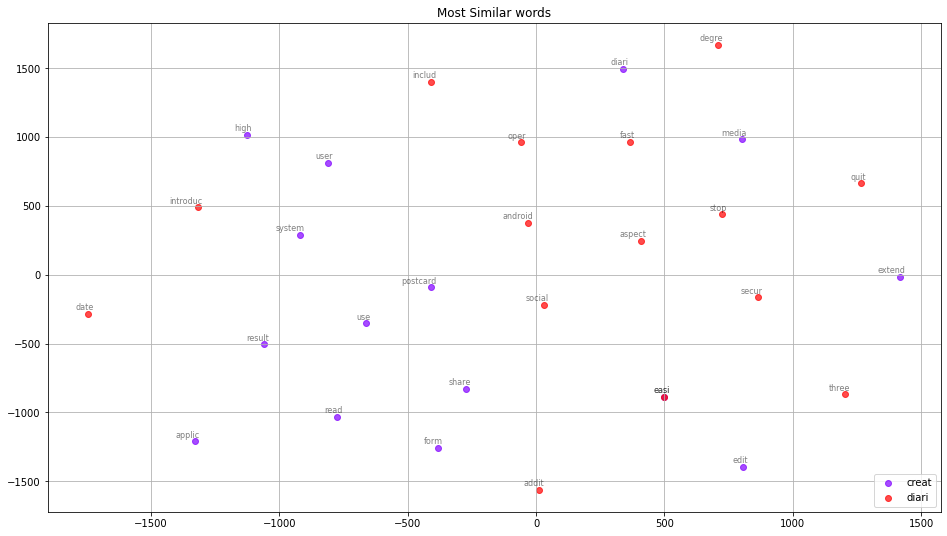

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Most Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')